In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as sp
import matplotlib.image as img

def trainer(vector):
    vector = vector.flatten()
    
    # "тупое" умножение числа на исло (не перемножение матриц)
    coefMat = np.outer(vector, vector)
    
    # диагональ в 0 тк нейрон сам себя не трогает
    np.fill_diagonal(coefMat, 0)
    
    return coefMat

def prediction(corruptedVec, coefMat, max_iterations=1):
    corruptedVec = corruptedVec.flatten()
    predictVec = corruptedVec.copy()
    
    for _ in range(max_iterations):
        # Чекаем что у нас будет в указах для нейронов
        net_input = coefMat @ predictVec
        
        # обновляем состояние каждого нейрона
        new_predictVec = np.where(net_input > 0, 1, -1)
        
        # Мб все?
        if np.array_equal(new_predictVec, predictVec):
            break  # Нечего ловить, так дальше и будет
        
        predictVec = new_predictVec
    
    # 2д
    side_length = int(np.sqrt(len(predictVec)))
    predictVec = predictVec.reshape(side_length, side_length)
    
    return predictVec


def imageGenerator(imageVector, vmax=1):
    if imageVector.ndim == 3 and imageVector.shape[2] == 4:
        imageVector = np.mean(imageVector, axis=2)
    # Делем чб
    
    cleanImage = np.where(imageVector == vmax, 1, -1)
    
    # Наваливаем шуму
    noisyImage = cleanImage + np.random.normal(0, 2, cleanImage.shape)
    
    # Бинаризируем
    noisyImage = np.where(noisyImage >= 0, 1, -1)
    
    return cleanImage, noisyImage



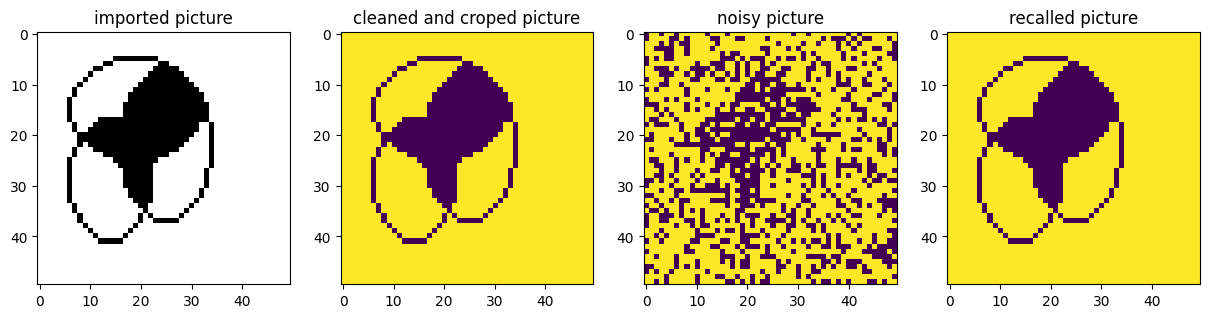

In [2]:

image = img.imread('5.png').copy()
vector, noisyVec = imageGenerator(image)
coefMatrix = trainer(vector)
predictedVec = prediction(noisyVec, coefMatrix)

plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(image)
plt.title('imported picture')
plt.subplot(1,4,2)
plt.imshow(vector)
plt.title('cleaned and croped picture')
plt.subplot(1,4,3)
plt.imshow(noisyVec)
plt.title('noisy picture')
plt.subplot(1,4,4)
plt.imshow(predictedVec)
plt.title('recalled picture')
plt.show()
